In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import math
import numpy as np

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)

In [3]:
df = df.reset_index()

In [4]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

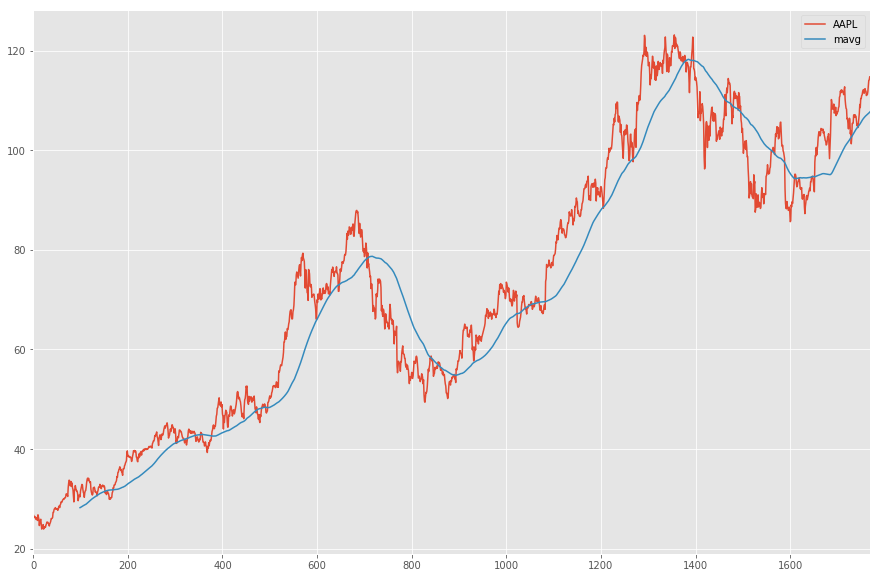

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(15, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

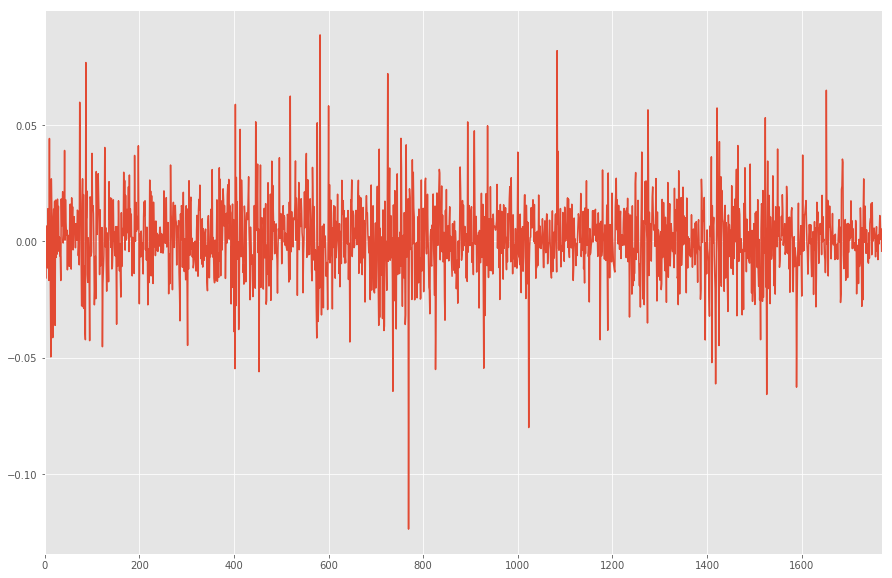

In [6]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [7]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
1,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
3,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
4,2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249
...,...,...,...,...,...,...,...
1765,2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.973305
1766,2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.008080
1767,2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,114.123047
1768,2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,114.736275


In [8]:
df_train = df[:-100]
print(df_train.shape)

df_test = df[-100:]
print(df_test.shape)
df_test.head()

(1670, 7)
(100, 7)


,Date,High,Low,Open,Close,Volume,Adj Close
1670,2016-08-22,109.099998,107.849998,108.860001,108.510002,25820200.0,103.435791
1671,2016-08-23,109.320000,108.529999,108.589996,108.849998,21257700.0,103.759895
1672,2016-08-24,108.750000,107.680000,108.570000,108.029999,23675100.0,102.978249
1673,2016-08-25,107.879997,106.680000,107.389999,107.570000,25086200.0,102.539757
1674,2016-08-26,107.949997,106.309998,107.410004,106.940002,27766300.0,101.939209


In [9]:
#plotting
def plot_train_val(train_data, val_data):
    fig = plt.figure(figsize=[10,8])
    ax = plt.subplot(111)
    ax.plot(train_data, label='Train')
    ax.plot(val_data, label='Valid')
    ax.legend()
    plt.show()

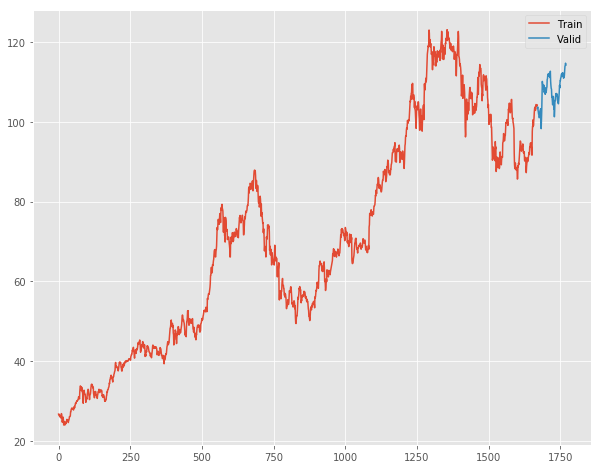

In [10]:
plot_train_val(df_train['Adj Close'], df_test['Adj Close'])

In [12]:
window = 10
train_data = df_train['Adj Close']
test_data = df_test['Adj Close']
index = len(train_data) - window

In [13]:
data = pd.DataFrame(np.zeros((index, window)))

for row in range(index):
    for col in range(window):
        data.iloc[row,col] = train_data[col+row]

In [14]:
y_train = data.iloc[:,-1]
y_train.shape

(1660,)

In [15]:
X_train = data.iloc[:,:-1]
X_train.shape

(1660, 9)

In [16]:
index = len(test_data) - window

In [17]:
data = pd.DataFrame(np.zeros((index, window)))

for row in range(index):
    for col in range(window):
        data.iloc[row,col] = train_data[col+row]

In [18]:
y_test = data.iloc[:,-1]
y_test.shape

(90,)

In [19]:
X_test = data.iloc[:,:-1]
X_test.shape

(90, 9)

In [20]:

# from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [21]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_lr)
print("Root Mean Squared Error: ", np.sqrt(mse))

Root Mean Squared Error:  0.6014868799015513


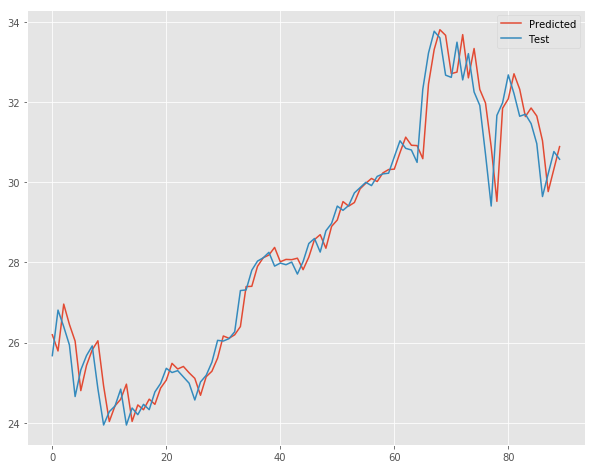

In [22]:
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(y_test.index, y_pred_lr, label='Predicted')
ax.plot(y_test, label='Test')
ax.legend()
plt.show()

In [23]:
import xgboost as xgb

In [24]:
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_model.fit(X_train, y_train)

C:\Users\tapan.amin\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\tapan.amin\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:10:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=None, subsample=0.6, verbosity=1)

In [25]:
y_pred_xgb = xgb_model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred_xgb)
print("Root Mean Squared Error: ", np.sqrt(mse))

Root Mean Squared Error:  0.10642833965574156


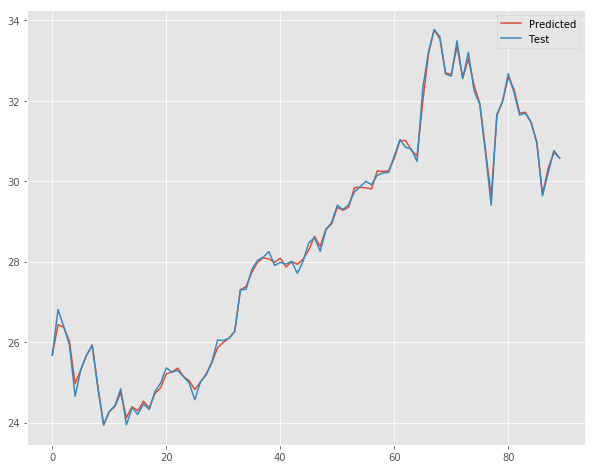

In [27]:
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(y_test.index, y_pred_xgb, label='Predicted')
ax.plot(y_test, label='Test')
ax.legend()
plt.show()

In [28]:
from sklearn.linear_model import Ridge

In [29]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred_ridge)
print("Root Mean Squared Error: ", np.sqrt(mse))

Root Mean Squared Error:  0.6014760784585437


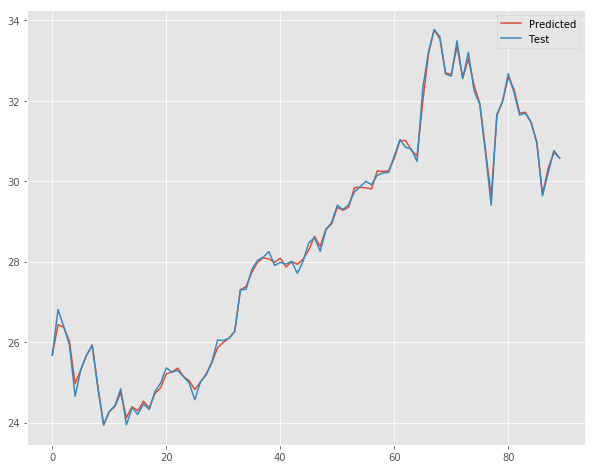

In [34]:
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(y_test.index, y_pred_xgb, label='Predicted')
ax.plot(y_test, label='Test')
ax.legend()
plt.show()